# Preparação do estado de bit-phase-flip

In [4]:
#from sympy import conjugate
from torch.autograd import Variable
import torch
from rsvg import rsvg
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from tools import *
import sys
import pickle
import os
import cmath
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere


In [5]:
n_qubits = 2
circuit, params = vqa(n_qubits)
target_vector, target_op = init_state_bpf(n_qubits, 0.5)
best_params, f = train(15, circuit, params, target_op)

0 0.825950051493094
1 0.34341064402391697
2 0.10839597137017408
3 0.0825485584020577
4 0.08194740952607801
5 0.03524857329699108
6 0.020959852473160158
7 0.015329853701347772
8 0.019469969033457307
9 0.02250465841069622
10 0.02509058670624685
11 0.0237800473591649
12 0.010578614894866202
13 0.006706136053715427
14 0.003339152393532277
14 0.003339152393532277


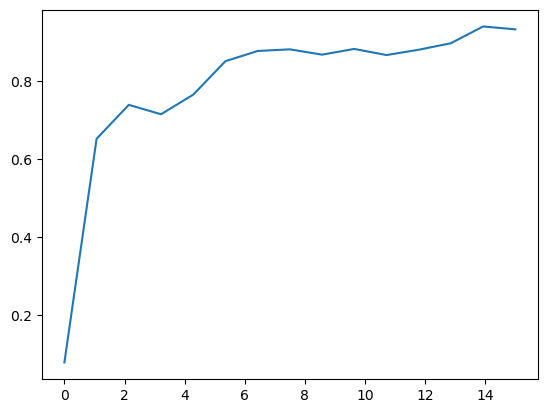

In [6]:
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

In [ ]:
from qiskit_experiments.library import StateTomography
from qiskit.providers.aer import AerSimulator

beckend = Aer.get_backend('qasm_simulator')

In [2]:
import qiskit
from qiskit import *
nshots = 8192
IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de')
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor

In [7]:
qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
print(params)
print(len(params))

tensor([-0.9126,  0.2416, -1.5080,  2.4952,  3.2626, -1.0970,  4.7538, -1.6607,
         0.3983,  2.1663,  0.1460,  3.5368,  0.3778,  0.2874, -1.7127,  3.4687,
        -0.7346, -0.9171, -1.4957, -0.2593, -0.4812,  0.1499, -1.6577,  1.3025],
       dtype=torch.float64, requires_grad=True)
24


In [ ]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
qstc = state_tomography_circuits(qc, qr[0])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')

rho

In [4]:
theta = np.linspace(0,np.pi,3)
phi = np.linspace(0,np.pi/2,3)

n = 10
n_qubits = 2
fidelidades = []
pes = np.linspace(0,1,n)
for i in range(0, n):
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_bpf(n_qubits, pes[i])
    best_params, f = train(15, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-2_BPF1.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

0 0.8019342422485352
1 0.5595741271972656
2 0.3142127990722656
3 0.1341104507446289
4 0.0710763931274414
5 0.038529396057128906
6 0.020328521728515625
7 0.011962890625
8 0.005364418029785156
9 0.005222320556640625
10 0.006257057189941406
11 0.004281044006347656
12 0.002780914306640625
13 0.004029273986816406
14 0.006890296936035156
14 0.006890296936035156
0 0.8566724702286012
1 0.4403098056526978
2 0.15728251109873542
3 0.0519254597707173
4 0.06638103638885748
5 0.053291235437159745
6 0.08723657758714508
7 0.06235286248592883
8 0.06235286248592883
9 0.038072063371966336
10 0.03924281638305612
11 0.025405915158662865
12 0.02263828808219481
13 0.018650248463363498
14 0.0145652710937793
14 0.0145652710937793
0 0.43186350771561444
1 0.15602020557962967
2 0.04137508943328821
3 0.035450685478142854
4 0.035450685478142854
5 0.02692332324286987
6 0.016071792572261625
7 0.024341158830895982
8 0.016587188842029876
9 0.014091548013954465
10 0.01093928104186512
11 0.013150230047260335
12 0.0138531

In [8]:
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

TypeError: object of type '_io.BufferedReader' has no len()

10


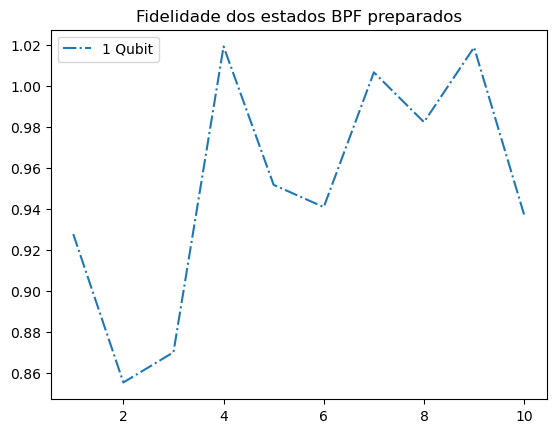

In [7]:
with open('Fidelidades_nqb-2_BPF1.pkl', 'rb') as f:
    y1 = pickle.load(f)
print(len(y1))
size = len(y1)
x = np.linspace(1, size, size)
plt.plot(x, y1[0:size], label='1 Qubit', linestyle="dashdot")
# plt.plot(x, y2[0:size], label='2 Qubit', linestyle=":")
# plt.plot(x, y3[0:size], label='3 Qubit', linestyle="--")
# plt.plot(x, y4[0:size], label='4 Qubit')
plt.title('Fidelidade dos estados BPF preparados')
#plt.ylim(0.95, 1.01)
plt.legend()
plt.show()

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


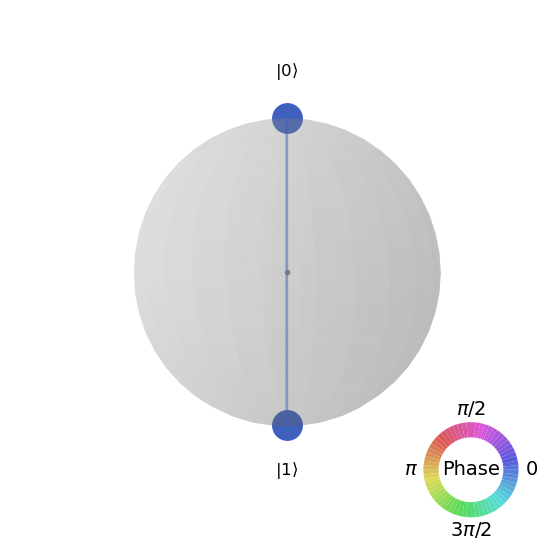

In [22]:
# TESTE COM O QISKIT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
sv=Statevector.from_label('+')
print(sv)
plot_state_qsphere(sv)

[0.5      +0.j 0.8660254+0.j]


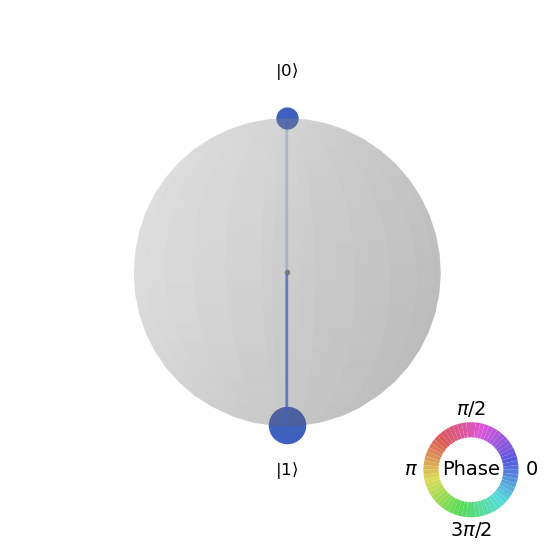

In [26]:
def general_state(theta, phi):
    state = np.zeros(2,dtype=complex)
    state[0] = np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    return state
print(general_state(np.pi/1.5,0))
sv=Statevector(general_state(np.pi/1.5,0))
plot_state_qsphere(sv)

In [9]:
import numpy as np
print(np.exp(np.float128(-10))) 
print(np.exp(np.float128(-10000)))

4.5399929762484851536e-05
1.1354838653147360985e-4343


In [5]:
def bpf(theta, phi, p):
    state = np.zeros(4,dtype=complex)
    state[0] = np.sqrt(1-p)*np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    state[2] = 1j*np.sqrt(p)*(-1)*cmath.exp(1j*phi)*np.sin(theta/2)
    state[3] = 1j*np.sqrt(p)*np.cos(theta/2)
    return state

print(bpf(np.pi/4,0,0.5))
#print(np.outer(bpf(np.pi/2,np.pi/4,0.5),bpf(np.pi/2,np.pi/4,0.5)))


[0.65328148+0.j         0.38268343+0.j         0.        -0.27059805j
 0.        +0.65328148j]


In [9]:
op = bpf(np.pi/1.5,0,0.5)
sv=Statevector(op)
plot_state_qsphere(sv)

QiskitError: 'Invalid input: not a vector or column-vector.'

NameError: name 'init_state_bpf' is not defined